In [1]:
import numpy as np
import csv
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as Data
import torchvision

In [2]:
from sklearn.model_selection import train_test_split
 #首先，读取.CSV文件成矩阵的形式。
my_matrix = np.loadtxt(open("results.csv"),delimiter=",",skiprows=0)
#print(my_matrix)
 #对于矩阵而言，将矩阵倒数第一列之前的数值给了X（输入数据），将矩阵大最后一列的数值给了y（标签）
X, y = my_matrix[:,:-1],my_matrix[:,-1]

#X = np.load('X_2019clinical.npy')
#y = np.load('y_2019clinical.npy')


In [3]:
#yy = np.load('y_reference.npy')
#len(yy)

In [4]:
#print(y_train)
label = y 
#print(y_train)
sx_1 = 1
sx_2 =(sx_1*0.99*0.27*0.99)
sx_8 = sx_1*0.99*0.27*0.25*0.99
sx_7 = sx_1*0.99*0.27*0.25*1
sx_6 = sx_1*0.99*0.31*0.99
sx_3 = sx_1*0.99*0.31*0.34
sx_4 = sx_1*0.99*0.31*0.51*0.47*0.88*0.78
sx_5 = sx_1*0.99*0.31*0.51*0.47*0.88*0.78*0.78
print(sx_6)
y = [sx_2 if i == 1 else i for i in y]
y = [sx_8 if i == 7 else i for i in y]
y = [1 if i == 0 else i for i in y]
y = [sx_3 if i == 2 else i for i in y]
y = [sx_4 if i == 3 else i for i in y]
y = [sx_5 if i == 4 else i for i in y]
y = [sx_6 if i == 5 else i for i in y]
y = [sx_7 if i == 6 else i for i in y]

#y_train = np.array(y_train)
print(y)

0.303831


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.2

In [5]:
X_train =[]
X_test =[]
y_train =[]
y_test =[]

for n in range(len(y)):
    if y[n] == sx_1:
        X_test.append(X[n])
        y_test.append(y[n])

for n in range(len(y)):
    if y[n] == sx_2 or y[n] == sx_4 or y[n] == sx_7:
        X_test.append(X[n])
        y_test.append(y[n])
    else:
        X_train.append(X[n])
        y_train.append(y[n])
print(y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.26462700000000006, 0.2

In [6]:
 #利用train_test_split方法，将X,y随机划分问，训练集（X_train），训练集标签（X_test），测试卷（y_train），
 #测试集标签（y_test），安训练集：测试集=7:3的
 #概率划分，到此步骤，可以直接对数据进行处理
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
 #此步骤，是为了将训练集与数据集的数据分别保存为CSV文件
 #np.column_stack将两个矩阵进行组合连接
#train= np.column_stack((X_train,y_train))
 #numpy.savetxt 将txt文件保存为.csv结尾的文件
#np.savetxt('train_usual.csv',train, delimiter = ',')
#test = np.column_stack((X_test, y_test))
#np.savetxt('test_usual.csv', test, delimiter = ',')

In [7]:
#print(y_train)
label = y_train
#print(label)
y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:

torch_x = torch.from_numpy(X_train)
torch_y = torch.from_numpy(y_train)
test_x = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)
y_train = torch.tensor(torch_y, dtype=torch.float32)
y_test = torch.tensor(test_y,dtype = torch.float32)
x_test = torch.tensor(test_x , dtype=torch.float32)
x_train = torch.tensor(torch_x, dtype=torch.float32)

D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use source

In [9]:
print(y_test)


tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

In [10]:
#Hyper parameters
EPOCH = 500
BATCH_SIZE = 100
TIME_STEP = 20
INPUT_SIZE = 60
LR = 0.001

In [11]:

x_test = x_test.reshape(x_test.shape[0], TIME_STEP, INPUT_SIZE)
x_train = x_train.reshape(x_train.shape[0], TIME_STEP, INPUT_SIZE)
#print(x_train.shape,x_test.shape)
torch_dataset = Data.TensorDataset(x_train,y_train )
train_loader = Data.DataLoader(dataset= torch_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=2)
#print(x_train,x_test)

In [12]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=3,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 1)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [13]:
class My_loss(nn.Module):
    def __init__(self):
    

    
        super().__init__()
        
    def forward(self , x, y):
        time = 1
        ave = torch.tensor(0)
        for n in range(len(x)):
            if y[n] == 1:
                ave = torch.add(x[n], ave)
                time += 1
        #print(ave,time)
        ave  = torch.div(ave,time) 
        div = torch.div(x,ave)
        loss = torch.mean(torch.pow((div - y),2))
        return loss

In [14]:
#print(len(X_out),len(y))

In [15]:
rnn =  RNN()
print(rnn)
optimizer = torch.optim.Adam(rnn.parameters(), lr = LR)
loss_func = My_loss()

RNN(
  (rnn): LSTM(60, 64, num_layers=3, batch_first=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [16]:
loss_x = []
loss_train = []
loss_tes =[]
for n in range(500):
    loss_x.append(n)
    train_out = rnn(x_train)
    #print(train_out.size())
    
    loss = loss_func(train_out, y_train)
    #print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_train.append(loss.data.item())
    
    test_out = rnn(x_test)
    loss_test = loss_func(test_out,y_test)
    loss_tes.append(loss_test.data.item())
    print('times:'+str(n)+' train:'+str(loss)+' test:'+ str(loss_test))
    

times:0 train:tensor(0.6209, grad_fn=<MeanBackward0>) test:tensor(0.5131, grad_fn=<MeanBackward0>)
times:1 train:tensor(0.5704, grad_fn=<MeanBackward0>) test:tensor(2.7073, grad_fn=<MeanBackward0>)
times:2 train:tensor(2.1388, grad_fn=<MeanBackward0>) test:tensor(0.4887, grad_fn=<MeanBackward0>)
times:3 train:tensor(0.5430, grad_fn=<MeanBackward0>) test:tensor(0.5120, grad_fn=<MeanBackward0>)
times:4 train:tensor(0.5692, grad_fn=<MeanBackward0>) test:tensor(0.5203, grad_fn=<MeanBackward0>)
times:5 train:tensor(0.5785, grad_fn=<MeanBackward0>) test:tensor(0.5245, grad_fn=<MeanBackward0>)
times:6 train:tensor(0.5831, grad_fn=<MeanBackward0>) test:tensor(0.5270, grad_fn=<MeanBackward0>)
times:7 train:tensor(0.5859, grad_fn=<MeanBackward0>) test:tensor(0.5286, grad_fn=<MeanBackward0>)
times:8 train:tensor(0.5877, grad_fn=<MeanBackward0>) test:tensor(0.5297, grad_fn=<MeanBackward0>)
times:9 train:tensor(0.5889, grad_fn=<MeanBackward0>) test:tensor(0.5305, grad_fn=<MeanBackward0>)
times:10 t

times:82 train:tensor(0.5776, grad_fn=<MeanBackward0>) test:tensor(0.5186, grad_fn=<MeanBackward0>)
times:83 train:tensor(0.5770, grad_fn=<MeanBackward0>) test:tensor(0.5181, grad_fn=<MeanBackward0>)
times:84 train:tensor(0.5764, grad_fn=<MeanBackward0>) test:tensor(0.5175, grad_fn=<MeanBackward0>)
times:85 train:tensor(0.5758, grad_fn=<MeanBackward0>) test:tensor(0.5170, grad_fn=<MeanBackward0>)
times:86 train:tensor(0.5752, grad_fn=<MeanBackward0>) test:tensor(0.5163, grad_fn=<MeanBackward0>)
times:87 train:tensor(0.5745, grad_fn=<MeanBackward0>) test:tensor(0.5157, grad_fn=<MeanBackward0>)
times:88 train:tensor(0.5737, grad_fn=<MeanBackward0>) test:tensor(0.5150, grad_fn=<MeanBackward0>)
times:89 train:tensor(0.5730, grad_fn=<MeanBackward0>) test:tensor(0.5143, grad_fn=<MeanBackward0>)
times:90 train:tensor(0.5722, grad_fn=<MeanBackward0>) test:tensor(0.5136, grad_fn=<MeanBackward0>)
times:91 train:tensor(0.5713, grad_fn=<MeanBackward0>) test:tensor(0.5128, grad_fn=<MeanBackward0>)


times:163 train:tensor(0.3494, grad_fn=<MeanBackward0>) test:tensor(0.3395, grad_fn=<MeanBackward0>)
times:164 train:tensor(0.3461, grad_fn=<MeanBackward0>) test:tensor(0.3376, grad_fn=<MeanBackward0>)
times:165 train:tensor(0.3429, grad_fn=<MeanBackward0>) test:tensor(0.3359, grad_fn=<MeanBackward0>)
times:166 train:tensor(0.3398, grad_fn=<MeanBackward0>) test:tensor(0.3342, grad_fn=<MeanBackward0>)
times:167 train:tensor(0.3368, grad_fn=<MeanBackward0>) test:tensor(0.3326, grad_fn=<MeanBackward0>)
times:168 train:tensor(0.3339, grad_fn=<MeanBackward0>) test:tensor(0.3311, grad_fn=<MeanBackward0>)
times:169 train:tensor(0.3311, grad_fn=<MeanBackward0>) test:tensor(0.3298, grad_fn=<MeanBackward0>)
times:170 train:tensor(0.3285, grad_fn=<MeanBackward0>) test:tensor(0.3285, grad_fn=<MeanBackward0>)
times:171 train:tensor(0.3259, grad_fn=<MeanBackward0>) test:tensor(0.3272, grad_fn=<MeanBackward0>)
times:172 train:tensor(0.3235, grad_fn=<MeanBackward0>) test:tensor(0.3261, grad_fn=<MeanBa

times:244 train:tensor(0.2856, grad_fn=<MeanBackward0>) test:tensor(0.3192, grad_fn=<MeanBackward0>)
times:245 train:tensor(0.2855, grad_fn=<MeanBackward0>) test:tensor(0.3192, grad_fn=<MeanBackward0>)
times:246 train:tensor(0.2854, grad_fn=<MeanBackward0>) test:tensor(0.3191, grad_fn=<MeanBackward0>)
times:247 train:tensor(0.2852, grad_fn=<MeanBackward0>) test:tensor(0.3191, grad_fn=<MeanBackward0>)
times:248 train:tensor(0.2851, grad_fn=<MeanBackward0>) test:tensor(0.3190, grad_fn=<MeanBackward0>)
times:249 train:tensor(0.2850, grad_fn=<MeanBackward0>) test:tensor(0.3190, grad_fn=<MeanBackward0>)
times:250 train:tensor(0.2848, grad_fn=<MeanBackward0>) test:tensor(0.3189, grad_fn=<MeanBackward0>)
times:251 train:tensor(0.2847, grad_fn=<MeanBackward0>) test:tensor(0.3189, grad_fn=<MeanBackward0>)
times:252 train:tensor(0.2846, grad_fn=<MeanBackward0>) test:tensor(0.3188, grad_fn=<MeanBackward0>)
times:253 train:tensor(0.2844, grad_fn=<MeanBackward0>) test:tensor(0.3188, grad_fn=<MeanBa

times:325 train:tensor(0.2747, grad_fn=<MeanBackward0>) test:tensor(0.3130, grad_fn=<MeanBackward0>)
times:326 train:tensor(0.2746, grad_fn=<MeanBackward0>) test:tensor(0.3129, grad_fn=<MeanBackward0>)
times:327 train:tensor(0.2745, grad_fn=<MeanBackward0>) test:tensor(0.3129, grad_fn=<MeanBackward0>)
times:328 train:tensor(0.2743, grad_fn=<MeanBackward0>) test:tensor(0.3128, grad_fn=<MeanBackward0>)
times:329 train:tensor(0.2742, grad_fn=<MeanBackward0>) test:tensor(0.3127, grad_fn=<MeanBackward0>)
times:330 train:tensor(0.2740, grad_fn=<MeanBackward0>) test:tensor(0.3126, grad_fn=<MeanBackward0>)
times:331 train:tensor(0.2739, grad_fn=<MeanBackward0>) test:tensor(0.3126, grad_fn=<MeanBackward0>)
times:332 train:tensor(0.2737, grad_fn=<MeanBackward0>) test:tensor(0.3125, grad_fn=<MeanBackward0>)
times:333 train:tensor(0.2736, grad_fn=<MeanBackward0>) test:tensor(0.3124, grad_fn=<MeanBackward0>)
times:334 train:tensor(0.2735, grad_fn=<MeanBackward0>) test:tensor(0.3123, grad_fn=<MeanBa

times:406 train:tensor(0.2609, grad_fn=<MeanBackward0>) test:tensor(0.3035, grad_fn=<MeanBackward0>)
times:407 train:tensor(0.2607, grad_fn=<MeanBackward0>) test:tensor(0.3033, grad_fn=<MeanBackward0>)
times:408 train:tensor(0.2604, grad_fn=<MeanBackward0>) test:tensor(0.3030, grad_fn=<MeanBackward0>)
times:409 train:tensor(0.2602, grad_fn=<MeanBackward0>) test:tensor(0.3027, grad_fn=<MeanBackward0>)
times:410 train:tensor(0.2599, grad_fn=<MeanBackward0>) test:tensor(0.3025, grad_fn=<MeanBackward0>)
times:411 train:tensor(0.2597, grad_fn=<MeanBackward0>) test:tensor(0.3022, grad_fn=<MeanBackward0>)
times:412 train:tensor(0.2594, grad_fn=<MeanBackward0>) test:tensor(0.3018, grad_fn=<MeanBackward0>)
times:413 train:tensor(0.2592, grad_fn=<MeanBackward0>) test:tensor(0.3015, grad_fn=<MeanBackward0>)
times:414 train:tensor(0.2589, grad_fn=<MeanBackward0>) test:tensor(0.3012, grad_fn=<MeanBackward0>)
times:415 train:tensor(0.2586, grad_fn=<MeanBackward0>) test:tensor(0.3009, grad_fn=<MeanBa

times:487 train:tensor(0.2504, grad_fn=<MeanBackward0>) test:tensor(0.2866, grad_fn=<MeanBackward0>)
times:488 train:tensor(0.2524, grad_fn=<MeanBackward0>) test:tensor(0.2895, grad_fn=<MeanBackward0>)
times:489 train:tensor(0.2522, grad_fn=<MeanBackward0>) test:tensor(0.2888, grad_fn=<MeanBackward0>)
times:490 train:tensor(0.2513, grad_fn=<MeanBackward0>) test:tensor(0.2855, grad_fn=<MeanBackward0>)
times:491 train:tensor(0.2516, grad_fn=<MeanBackward0>) test:tensor(0.2864, grad_fn=<MeanBackward0>)
times:492 train:tensor(0.2488, grad_fn=<MeanBackward0>) test:tensor(0.2873, grad_fn=<MeanBackward0>)
times:493 train:tensor(0.2506, grad_fn=<MeanBackward0>) test:tensor(0.2862, grad_fn=<MeanBackward0>)
times:494 train:tensor(0.2487, grad_fn=<MeanBackward0>) test:tensor(0.2846, grad_fn=<MeanBackward0>)
times:495 train:tensor(0.2506, grad_fn=<MeanBackward0>) test:tensor(0.2864, grad_fn=<MeanBackward0>)
times:496 train:tensor(0.2493, grad_fn=<MeanBackward0>) test:tensor(0.2865, grad_fn=<MeanBa

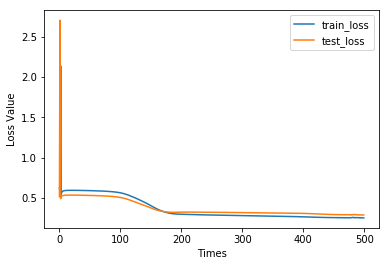

In [23]:
plt.xlabel('Times')
plt.ylabel('Loss Value')
plt.plot(loss_x,loss_train,label = 'train_loss')
plt.plot(loss_x,loss_tes,label = 'test_loss')
plt.legend()
plt.savefig('Analysis_loss.tif', dpi = 400)
plt.show()

In [18]:
average = np.loadtxt(open("average.csv"),delimiter=",",skiprows=0)
average

array([0.05070995, 0.04952454, 0.04884437, ..., 0.02296055, 0.02446511,
       0.02585766])

In [19]:
my_matrix = np.loadtxt(open("results.csv"),delimiter=",",skiprows=0)
#print(my_matrix)
 #对于矩阵而言，将矩阵倒数第一列之前的数值给了X（输入数据），将矩阵大最后一列的数值给了y（标签）
X, y = my_matrix[:,:-1],my_matrix[:,-1]
torch_y = torch.from_numpy(y)
y_input = torch.tensor(torch_y , dtype=torch.float32)
X_loss = []
axis = []
for n in range(40):
    #X_minloss = 0
    #print('start'+ str(X_minloss))
    axis.append(n)
    for i in range(30):
        for j in range(len(X)):
            X[j][n*30+i] = average[n*30+i]
    
            
    torch_X = torch.from_numpy(X)
    X_input = torch.tensor(torch_X , dtype=torch.float32)
    X_input = X_input.reshape(X_input.shape[0], TIME_STEP, INPUT_SIZE)
    loss_func = My_loss()
    
    X_out = rnn(X_input)
    X_minloss = loss_func(X_out,y_input)
    X_minloss = X_minloss.data.item()
    
    #print(X_minloss)
    
    '''
    for m in range(len(X)):
        minloss = out[m].data.item() - X_out[m].data.item()
        minloss = minloss
        X_minloss += minloss
    print('time: '+str(n)+'loss: '+str(X_minloss))
    '''
    X_loss.append(X_minloss)
    
print(X_loss)    
    

D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[11.636916160583496, 11.686973571777344, 11.611454010009766, 11.701814651489258, 11.640459060668945, 11.481893539428711, 11.50269603729248, 11.611889839172363, 11.554426193237305, 11.598244667053223, 11.62209701538086, 11.79577922821045, 11.919951438903809, 11.759248733520508, 11.888781547546387, 11.762721061706543, 11.651314735412598, 11.550673484802246, 11.750004768371582, 11.630305290222168, 11.835027694702148, 11.782811164855957, 12.053817749023438, 12.20974063873291, 12.573625564575195, 12.524901390075684, 13.143271446228027, 13.216571807861328, 11.565595626831055, 11.563440322875977, 11.634492874145508, 11.641812324523926, 11.709940910339355, 11.790889739990234, 11.782201766967773, 11.782801628112793, 11.790120124816895, 11.796016693115234, 11.809345245361328, 11.811124801635742]


In [20]:
from sklearn import preprocessing

In [21]:
results = preprocessing.scale(X_loss)

[-5.14038990e-01 -3.83729162e-01 -5.80322251e-01 -3.45094753e-01
 -5.04816086e-01 -9.17595037e-01 -8.63441819e-01 -5.79187697e-01
 -7.28777490e-01 -6.14708911e-01 -5.52616300e-01 -1.00485463e-01
  2.22760565e-01 -1.95581920e-01  1.41618870e-01 -1.86542730e-01
 -4.76556512e-01 -7.38546569e-01 -2.19645880e-01 -5.31248457e-01
  1.68643841e-03 -1.34244023e-01  5.71242345e-01  9.77141979e-01
  1.92440994e+00  1.79757081e+00  3.40731636e+00  3.59813241e+00
 -6.99701137e-01 -7.05311840e-01 -5.20347307e-01 -5.01293259e-01
 -3.23940415e-01 -1.13213816e-01 -1.35830412e-01 -1.34268849e-01
 -1.15217284e-01 -9.98672929e-02 -6.51703059e-02 -6.05377517e-02]


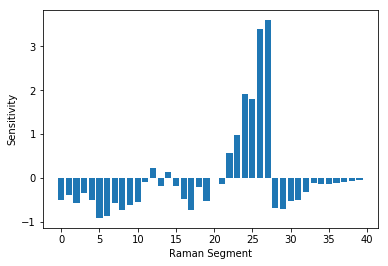

In [24]:
print(results)
axis =[]
for n in range(40):
    axis.append(n)
#print(axis)

plt.xlabel('Raman Segment')
plt.ylabel('Sensitivity')
plt.bar(axis, results)
plt.savefig('Analysis.tif', dpi = 400)
plt.show()

